In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
sys.path.insert(0,os.path.join(os.path.abspath('../')))

In [3]:
from time import time
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import hgmm
from hgmm.histogram_gmm import HistogramGaussianMixture
from hgmm.utilities import *

In [4]:
data_path = os.path.join(os.path.join(os.path.abspath('../')),'data')

In [5]:
len(get_filenames_in_dir(os.path.join(data_path, 'ams')))

40

### Load files into a combined DataFrame

In [6]:
file_names = get_filenames_in_dir(os.path.join(data_path, 'ams'))
fraglen_count_dict = merge_fragcount_files(os.path.join(data_path,'ams'), file_names)

In [7]:
np.array(list(fraglen_count_dict.values())).sum()

1617078815

In [8]:
fraglen_counts_df = create_df_from_dict(fraglen_count_dict, ['frag_len', 'count'])

In [9]:
fraglen_counts_df['count'].sum()

1617078815

In [10]:
# __ =plt.hist(fraglen_counts_df['frag_len'], bins=fraglen_counts_df.shape[0]//25, weights=fraglen_counts_df['count'])

<AxesSubplot:xlabel='frag_len', ylabel='Count'>

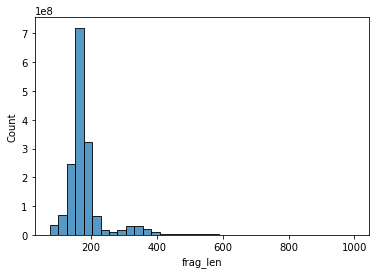

In [11]:
import seaborn as sns

sns.histplot(data=fraglen_counts_df, x='frag_len', weights='count', bins=fraglen_counts_df.shape[0]//25)

### Explore multiple components fitting (optional)

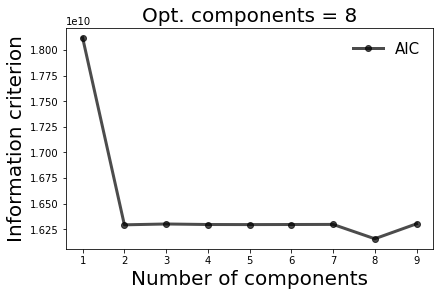

In [12]:
x = fraglen_counts_df.values
opt_ic = explore_optimal_componentsnumber(x, max_ncomponents=9, inf_criterion='aic', random_state=42)

### Fit HistogramGaussianMixture model

In [13]:
# x has shape (unique_samples, nfeatures + 1) where the last column is the count of each unique sample in the data
x = fraglen_counts_df.values

# we can use explore_optimal_componentsnumber() function to get optimal values
# or user-specified
n_optimal = 3

tick = time()
# create HGMM model
hgmm = HistogramGaussianMixture(n_components=n_optimal, # number of mixture models 
                                max_iter=1000,
                                random_state=42,
                                means_init = np.array([[170],[340], [500]]), # means of shape (n_components, n_features)
                                fixed_means=True, # to fix the means during learning (it will be equal to means_init)
                                covariance_type = 'full')
hgmm.fit(x)
tock = time()
print('time spent', tock-tick)

time spent 0.00987386703491211


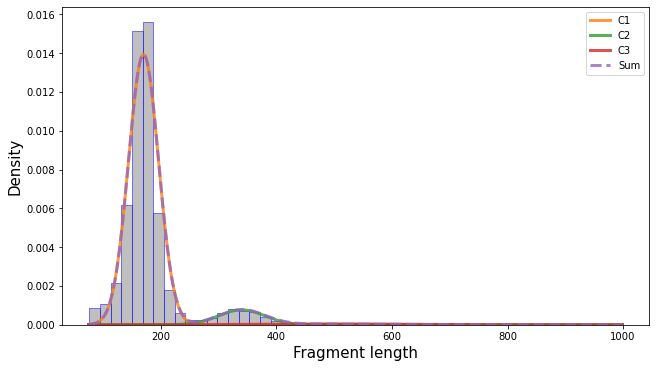

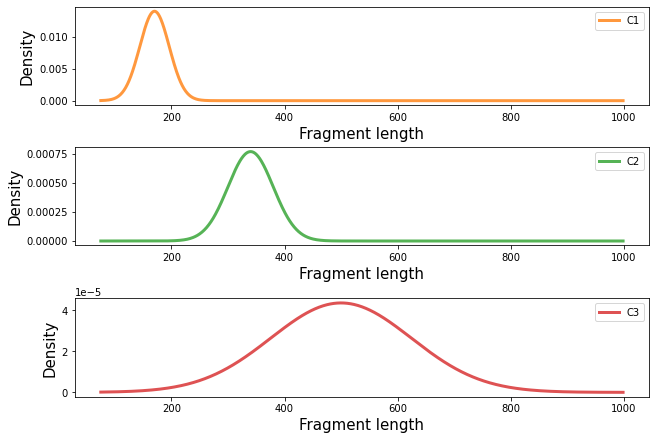

In [14]:
plot_1D_hgmm_res(hgmm, x)

In [15]:
print_model_parameters('hgmm', hgmm)


~~~~~~~~~~~~~~~
model_type: hgmm
hgmm.covariances_:
 [[[  677.92471076]]

 [[ 1603.19937115]]

 [[15469.52354041]]]
hgmm.means_:
 [[170.]
 [340.]
 [500.]]
hgmm.weights_:
 [0.90948845 0.07693579 0.01357576]
~~~~~~~~~~~~~~~



In [16]:
hgmm.converged_

True

In [17]:
hgmm.aic(x), hgmm.bic(x)

(16338985072.096767, 16338985168.116203)

### Predict the label (or probability distribution) of the samples

In [18]:
hgmm.predict(x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [19]:
hgmm.predict_proba(x)

array([[9.93707551e-001, 1.34246785e-008, 6.29243545e-003],
       [9.94362364e-001, 1.37934157e-008, 5.63762242e-003],
       [9.94942288e-001, 1.41832780e-008, 5.05769779e-003],
       ...,
       [7.97967802e-214, 1.76883738e-054, 1.00000000e+000],
       [2.43128773e-214, 1.21211294e-054, 1.00000000e+000],
       [7.39732672e-215, 8.30147848e-055, 1.00000000e+000]])